In [5]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Data points and labels
X = np.array([[0, 0], [0, -1], [-2, 0]])
y = np.array([-1, -1, 1])

# Number of features
n_features = X.shape[1]

# Quadratic Program (QP) setup
def objective(wb):
    w = wb[:-1]
    return 0.5 * np.dot(w, w)  # 1/2 * w^T * w

def constraint(wb, X, y, i):
    w = wb[:-1]
    b = wb[-1]
    return y[i] * (np.dot(w, X[i]) + b) - 1

# Initial guess for optimization
initial_guess = np.zeros(n_features + 1)

# Constraints for all points
constraints = [{'type': 'ineq', 'fun': constraint, 'args': (X, y, i)} for i in range(len(y))]

# Solve the QP problem
result = minimize(objective, initial_guess, constraints=constraints)

# Extract the optimal parameters
w_opt = result.x[:-1]
b_opt = result.x[-1]

# Print results
w_opt, b_opt

(array([-1.00000000e+00, -1.92319848e-16]), np.float64(-1.0000000000000002))

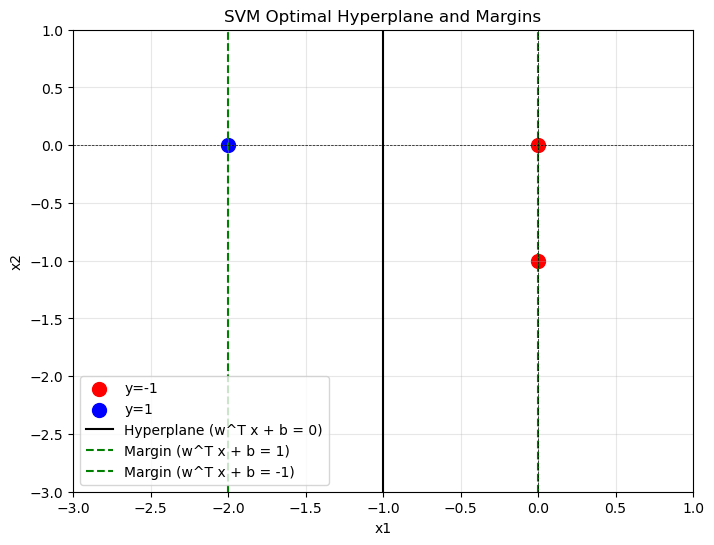

array([ 1.03993427e+16,  1.01892549e+16,  9.97916720e+15,  9.76907946e+15,
        9.55899173e+15,  9.34890400e+15,  9.13881627e+15,  8.92872854e+15,
        8.71864081e+15,  8.50855308e+15,  8.29846535e+15,  8.08837762e+15,
        7.87828989e+15,  7.66820216e+15,  7.45811443e+15,  7.24802670e+15,
        7.03793897e+15,  6.82785124e+15,  6.61776351e+15,  6.40767578e+15,
        6.19758805e+15,  5.98750032e+15,  5.77741259e+15,  5.56732486e+15,
        5.35723713e+15,  5.14714940e+15,  4.93706166e+15,  4.72697393e+15,
        4.51688620e+15,  4.30679847e+15,  4.09671074e+15,  3.88662301e+15,
        3.67653528e+15,  3.46644755e+15,  3.25635982e+15,  3.04627209e+15,
        2.83618436e+15,  2.62609663e+15,  2.41600890e+15,  2.20592117e+15,
        1.99583344e+15,  1.78574571e+15,  1.57565798e+15,  1.36557025e+15,
        1.15548252e+15,  9.45394787e+14,  7.35307056e+14,  5.25219326e+14,
        3.15131596e+14,  1.05043865e+14, -1.05043865e+14, -3.15131596e+14,
       -5.25219326e+14, -

In [7]:
# Plot the data points
plt.figure(figsize=(8, 6))
for i, point in enumerate(X):
    if y[i] == 1:
        plt.scatter(point[0], point[1], color='blue', label='y=1' if i == 2 else "", s=100)
    else:
        plt.scatter(point[0], point[1], color='red', label='y=-1' if i == 0 else "", s=100)

# Plot the hyperplane
x_vals = np.linspace(-3, 1, 100)
hyperplane = -(w_opt[0] * x_vals + b_opt) / w_opt[1]
plt.plot(x_vals, hyperplane, 'k-', label='Hyperplane (w^T x + b = 0)')

# Plot the margins
margin_plus = -(w_opt[0] * x_vals + b_opt + 1) / w_opt[1]
margin_minus = -(w_opt[0] * x_vals + b_opt - 1) / w_opt[1]
plt.plot(x_vals, margin_plus, 'g--', label='Margin (w^T x + b = 1)')
plt.plot(x_vals, margin_minus, 'g--', label='Margin (w^T x + b = -1)')

# Set plot details
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlim(-3, 1)
plt.ylim(-3, 1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Optimal Hyperplane and Margins')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
hyperplane